# Geometría diferencial

## Expresiones básicas

Referencia $x$, cartesiana, con base $\vec e_j$.

Referencia $y$, coordenadas curvilíneas "útiles", con base $\vec b_j$.

Transformación $x = x(y)$ y su inversa, $y=y(x)$.

Transformación de basis vectors:

$$\vec b_j = \frac{\partial x^i}{\partial y^j} \vec e_i$$

Derivada de un vector:

$$V = V^j\,\vec b_j$$

$$\frac{\partial V}{\partial z} = \frac{\partial V^j}{\partial z}\,\vec b_j + V^j\, \frac{\partial \vec b _ j}{\partial z}$$

$$\frac{\partial \vec b _ j}{\partial z} = \frac{\partial \vec b _ j}{\partial y_i} \frac{\partial y_i}{\partial z}$$

$$\frac{\partial \vec b _ j}{\partial y^i} = \Gamma^k_{ji} \vec b_k$$

La conexión se puede obtener directamente de la métrica.

## Cálculo simbólico

El módulo umucv.tensor admite tensores simbólicos.

In [79]:
from sympy import *
from sympy.abc import alpha, beta, gamma, epsilon
from sympy.physics.mechanics import init_vprinting

init_printing(pretty_print=True)
init_vprinting(pretty_print=True)

import numpy as np
import numpy.linalg as la

from umucv.tensor import T, mul, mapAt

def apply(t,f):
    return T(np.vectorize(f)(t.A),t.idx)

subs = lambda r, t: apply(r,lambda x: x.subs(t))

def sht(t):
    if len(t.idx) == 4:
        for t in t.A:
            display(sht(T(t)))
    elif len(t.idx) == 3:
        return [Matrix(x.tolist()) for x in t.A]
    else:
        return Matrix(t.A.tolist())

def delta(n):
    return T(np.eye(n))

## Experimentos

WIP

In [ ]:
pru = T([[1,2],[3,4]],'uv')
pru

In [ ]:
pru @ pru.inv()

In [ ]:
pru('uv') @ pru.inv()('wu')

In [ ]:
pru('uv') @ pru.inv()('vw')

In [ ]:
pru('xx')

In [ ]:
u,v,a,t,rho, c, g = symbols('u v a t rho c g')
f = Function('f')

U = T([u,v],'u')

sphere = T([rho*sin(u)*cos(v),
            rho*sin(u)*sin(v),
            rho*cos(u)],'r'),  T([u,v],'u')

torus = T([(a+cos(u))*cos(v),
           (a+cos(u))*sin(v),
           sin(u)],'r')

torus2 = T(
    [(c+a*cos(v))*cos(u),
     (c+a*cos(v))*sin(u),
     a*sin(v)])

spherical = T(
    [rho*sin(u)*cos(v),
     rho*sin(u)*sin(v),
     rho*cos(u)],'r')

trumpet = T(
    [(a+u**2)*cos(rho),
     (a+u**2)*sin(rho),
     u]), T([rho,u],'u')

revol = T(
    [f(u)*cos(rho),
     f(u)*sin(rho),
     u]), T([u,rho],'u')   # en general, z = g(u)

In [ ]:
#r = torus2
r = spherical; U = T([rho,u,v],'u')
#r,U = revol
#r,U = sphere

sht(r)

In [ ]:
J = r.deriv(U)
sht(J)

In [ ]:
g = J('ru') @ J('rv')
sht(g)

In [ ]:
g = g.simplify()
sht(g)

In [ ]:
t1 = g('ij').deriv(U('k')) + g('jk').deriv(U('i')) - g('ki').deriv(U('j'))
sht(t1.simplify())

In [ ]:
t2 = r('m').deriv(U('i')).deriv(U('k')) @ r('m').deriv(U('j'))@T(2)
sht(t2.simplify())

In [ ]:
sht((t1-t2).simplify())

In [ ]:
gc = g.inv()
sht(gc)

In [ ]:
christoffel = T(Rational(1,2)) @ gc('nm') @ (  g('in').deriv(U('j'))  
                                            +  g('nj').deriv(U('i'))
                                            -  g('ji').deriv(U('n')))

In [ ]:
sht(christoffel)

In [ ]:
christoffel.idx

In [ ]:
U.A

In [ ]:
d1 = T([diff(v(t),t)   for v in U.A for v in [Function(v)]])
d2 = T([diff(v(t),t,t) for v in U.A for v in [Function(v)]])

In [ ]:
geodesic = d2('m') + christoffel @ d1('i') @ d1('j')

print(geodesic.idx)
sht(geodesic)

In [ ]:
sht(geodesic.simplify())

In [ ]:
solve(geodesic.A.tolist(),d2.A.tolist())

In [ ]:
Γ = christoffel('ijl')

riemann = Γ('ijl').deriv(U('k')) - Γ('ijk').deriv(U('l')) + Γ('rjl') @ Γ('irk') - Γ('rjk') @ Γ('irl')

In [ ]:
riemann = riemann.reorder('ijkl')

In [ ]:
sht(riemann)

In [ ]:
riemann1 = g('ix') @ riemann('xjkl')
sht(riemann1)

In [ ]:
riemann1.idx

In [ ]:
bianchi = riemann1('ijlk') + riemann1('iklj') + riemann1('iljk')
sht(bianchi.simplify())

Hmmm, debería ser cero.

In [ ]:
ricci = riemann('ijkl') @ delta(2)('ik')
sht(ricci)

In [ ]:
ricci = riemann('ijil')
sht(ricci)

In [ ]:
R = ricci('ij') @ gc('ij')
np.asscalar(R.A).simplify()

https://en.wikipedia.org/wiki/Riemann_curvature_tensor

http://www.win.tue.nl/~rvhassel/Onderwijs/Tensor-ConTeX-Bib/Examples-diff-geom/Torus-diff-geom/torus-together.pdf

http://www2.warwick.ac.uk/fac/sci/physics/current/teach/module_home/px436/notes/lecture9.pdf

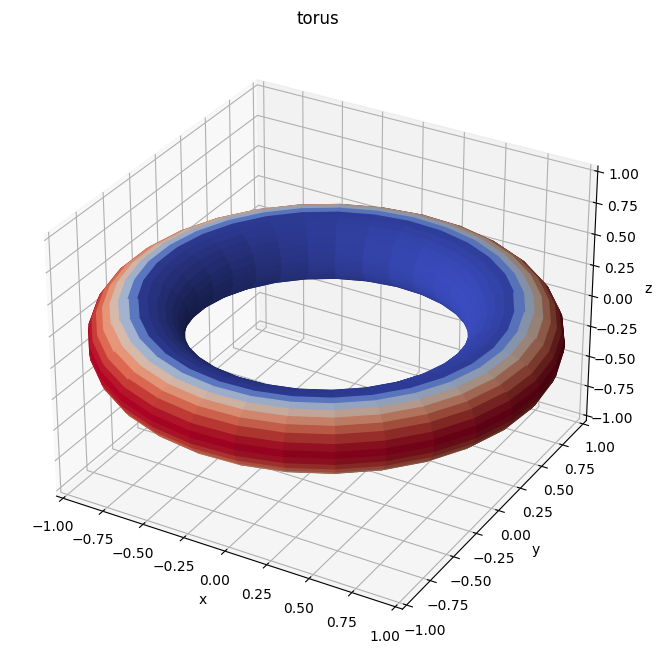

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib import cm
import numpy as np

#plt.rc('axes',  labelsize=10)

# Generate torus mesh
angle = np.linspace(0, 2*np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

curv = 2*np.cos(phi) / r / (r*np.cos(phi)+R)
curv = curv / (curv).max()

# Display the mesh
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, facecolors=cm.coolwarm(curv))
plt.title('torus'); plt.xlabel('x'); plt.ylabel('y'); ax.set_zlabel('z');

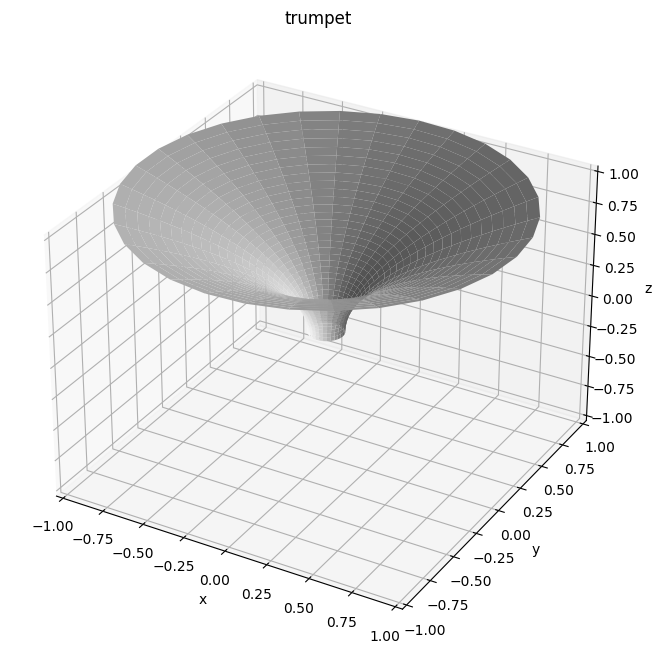

In [117]:
theta, h = np.meshgrid(np.linspace(0,2*np.pi,32),
                       np.linspace(0,1,32))
f = lambda x: 0.1+x**2
X = f(h) * np.cos(theta)
Y = f(h) * np.sin(theta)
Z = h

# Display the mesh
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax = fig.gca()
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color='w');# facecolors=cm.coolwarm(curv))
plt.title('trumpet'); plt.xlabel('x'); plt.ylabel('y'); ax.set_zlabel('z');

In [118]:
def mkSurf(s,u):
    us = np.meshgrid(*[np.linspace(a,b,n) for a,b,n in u])
    return s(us)

def trump(u):
    h,theta = u
    f = lambda x: 0.1+x**2
    return ( f(h) * np.cos(theta)
           , f(h) * np.sin(theta)
           , h )

X,Y,Z = mkSurf(trump,[(0,1,32),(0,2*np.pi,32)])

def vec(u):
    h,theta = u
    return ( 0
           , 0
           , 0.5 )

In [119]:
trump((0,0))

In [120]:
u0 = np.array([0.5, 1])
u1 = np.array([0.8, 3])
path = np.array([trump(p*u1 + (1-p)*u0) for p in np.linspace(0,1,20) ])
#path

In [121]:
r,U = trumpet

u_0, u_1, rho_0, rho_1 = symbols('u_0 u_1 rho_0 rho_1')

curve = {u: (1-t)*u_0 + t*u_1, rho: (1-t)*rho_0 + t*rho_1}

cur2 = T([(1-t)*u_0 + t*u_1, (1-t)*rho_0 + t*rho_1],'c')

In [122]:
sht(cur2)

⎡t⋅u₁ + u₀⋅(1 - t)⎤
⎢                 ⎥
⎣ρ₀⋅(1 - t) + ρ₁⋅t⎦

In [123]:
cur =  apply(r,lambda x: x.subs(curve)).simplify()
sht(cur)

⎡⎛                       2⎞                        ⎤
⎢⎝a + (t⋅u₁ - u₀⋅(t - 1)) ⎠⋅cos(-ρ₀⋅t + ρ₀ + ρ₁⋅t) ⎥
⎢                                                  ⎥
⎢⎛                        2⎞                       ⎥
⎢⎝-a - (t⋅u₁ - u₀⋅(t - 1)) ⎠⋅sin(ρ₀⋅(t - 1) - ρ₁⋅t)⎥
⎢                                                  ⎥
⎣                t⋅u₁ - u₀⋅(t - 1)                 ⎦

In [124]:
tan = apply(r,lambda x: x.subs(curve).diff(t)).simplify()
sht(tan)

⎡  ⎛                       2⎞                                                 
⎢- ⎝a + (t⋅u₁ - u₀⋅(t - 1)) ⎠⋅(ρ₀ - ρ₁)⋅sin(ρ₀⋅(t - 1) - ρ₁⋅t) - 2⋅(u₀ - u₁)⋅(
⎢                                                                             
⎢  ⎛                       2⎞                                                 
⎢- ⎝a + (t⋅u₁ - u₀⋅(t - 1)) ⎠⋅(ρ₀ - ρ₁)⋅cos(-ρ₀⋅t + ρ₀ + ρ₁⋅t) + 2⋅(u₀ - u₁)⋅(
⎢                                                                             
⎣                                                       -u₀ + u₁              

                                         ⎤
t⋅u₁ - u₀⋅(t - 1))⋅cos(-ρ₀⋅t + ρ₀ + ρ₁⋅t)⎥
                                         ⎥
                                         ⎥
t⋅u₁ - u₀⋅(t - 1))⋅sin(ρ₀⋅(t - 1) - ρ₁⋅t)⎥
                                         ⎥
                                         ⎦

In [125]:
acc = apply(tan,lambda x: x.diff(t)).simplify()
#sht(acc)

In [126]:
tanf = lambdify([a, u_0, u_1,rho_0,rho_1,t],list(tan.A),'math')

curf = lambdify([a, u_0, u_1,rho_0,rho_1,t],list(cur.A),'math')

accf = lambdify([a, u_0, u_1,rho_0,rho_1,t],list(acc.A),'math')

In [127]:
tanf(0.1,0,1,0,1,0.5)

In [128]:
curf(0.1,0,1,0,1,0.5)

In [129]:
accf(0.1,0,1,0,1,0.5)

In [130]:
ct = np.linspace(0,1,10)
#vec0 =  np.array([trump(p*u1 + (1-p)*u0) for p in ct ])
vec0 =  np.array([curf(0.1,0.5,0.8,1,3,p) for p in ct ])
vec1 =  0.5*np.array([tanf(0.1,0.5,0.8,1,3,p) for p in np.linspace(0,1,10) ])
vec2 =  0.1*np.array([accf(0.1,0.5,0.8,1,3,p) for p in np.linspace(0,1,10) ])

In [131]:
J = r.deriv(U)
g = J('ru') @ J('rv').simplify()
gc = g.inv()
christoffel = T(Rational(1,2)) @ gc('nm') @ (  g('in').deriv(U('j'))  
                                            +  g('nj').deriv(U('i'))
                                            -  g('ji').deriv(U('n')))
sht(christoffel.simplify())

⎡                  ⎡     ⎛     2⎞           ⎤⎤
⎢⎡         2⋅u  ⎤  ⎢-2⋅u⋅⎝a + u ⎠           ⎥⎥
⎢⎢  0     ──────⎥  ⎢──────────────     0    ⎥⎥
⎢⎢             2⎥  ⎢      2                 ⎥⎥
⎢⎢        a + u ⎥  ⎢   4⋅u  + 1             ⎥⎥
⎢⎢              ⎥, ⎢                        ⎥⎥
⎢⎢ 2⋅u          ⎥  ⎢                  4⋅u   ⎥⎥
⎢⎢──────    0   ⎥  ⎢      0         ────────⎥⎥
⎢⎢     2        ⎥  ⎢                   2    ⎥⎥
⎣⎣a + u         ⎦  ⎣                4⋅u  + 1⎦⎦

In [132]:
tan('t')

T([-(a + (t*u_1 - u_0*(t - 1))**2)*(rho_0 - rho_1)*sin(rho_0*(t - 1) - rho_1*t) - 2*(u_0 - u_1)*(t*u_1 - u_0*(t - 1))*cos(-rho_0*t + rho_0 + rho_1*t,
   -(a + (t*u_1 - u_0*(t - 1))**2)*(rho_0 - rho_1)*cos(-rho_0*t + rho_0 + rho_1*t) + 2*(u_0 - u_1)*(t*u_1 - u_0*(t - 1))*sin(rho_0*(t - 1) - rho_1*t,
   -u_0 + u_1], dtype=object,'t')

In [134]:
# christoffel('itk') @ cur('t')

In [135]:
# %matplotlib notebook

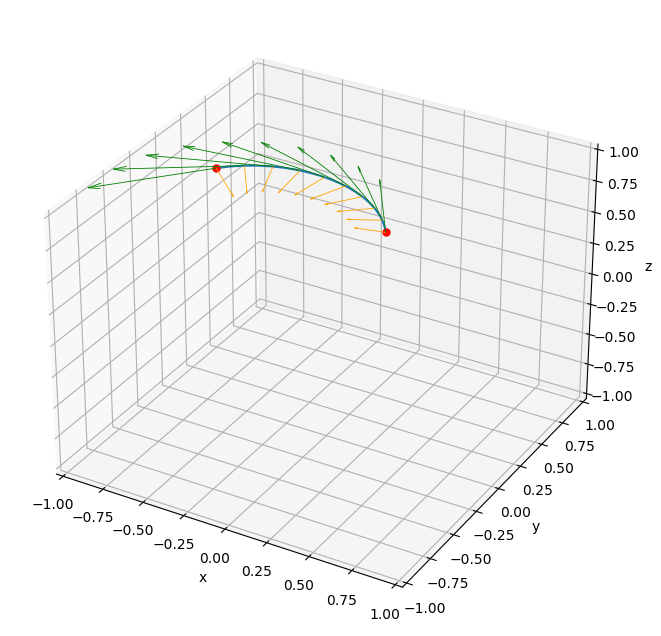

In [142]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
plt.quiver(vec0[:,0],vec0[:,1],vec0[:,2],vec1[:,0],vec1[:,1],vec1[:,2],arrow_length_ratio=0.1,color='green',lw=0.6)
plt.quiver(vec0[:,0],vec0[:,1],vec0[:,2],vec2[:,0],vec2[:,1],vec2[:,2],arrow_length_ratio=0.1,color='orange',lw=0.6)
#ax.plot_surface(X, Y, Z, color='w',zorder=0);# facecolors=cm.coolwarm(curv))
px,py,pz = path.T
ax.plot(px,py,pz)
ax.plot(px[[0,-1]],py[[0,-1]],pz[[0,-1]],'.',markersize=10, color='red')
x2, y2, _ = proj3d.proj_transform(px[0], py[0],pz[0], ax.get_proj())

if False:
    ax.annotate('$x_0$', xy=(x2+0.001,y2+0.003), xytext=(0.02,0.08), 
                #arrowprops=dict(facecolor='black', shrink=0.1, width=1, color='gray', headwidth=7)
                arrowprops=dict(color='gray', arrowstyle='->'))

plt.xlabel('x'); plt.ylabel('y'); ax.set_zlabel('z');

Algoritmos para econtrar geodésicas:

http://cs.stanford.edu/people/jbaek/18.821.paper2.pdf

## Covariant derivative

Usamos el convenio $\bar x = (x,y)$ son las coordenadas "cartesianas" y $x=(\rho, \theta)$ son las coordenadas "convenientes".

In [2]:
x,y,rho,theta,t,e_1,e_2,e_rho,e_theta = symbols(
    'x y rho theta t e_1 e_2 e_rho e_theta', real=True, positive=True)

### Ejemplo de Kay

Este es el Solved Problem 3.4 de transformación de coordenadas de un vector que aparece en Kay88:

Suppose that $(T^i)$ is a contravariant vector on $R^2$ and that $(T^i) = (x^2, x^1)$ in the $(x^i)$-system. Calculate $(\bar T^i)$ in the $(\bar x^i)$-system, under the change of coordiantes:

$$\bar x^1 = (x^2)^2 \neq 0$$
$$\bar x^2 = x^1 x^2$$

In [3]:
X = T([x,y],'x')
P = T([rho,theta],'p')

Dir = {x: theta**2, y: theta*rho}
Sol = {rho: y/sqrt(x), theta: sqrt(x)}

A = subs(T([x,y]),Dir)
B = subs(T([rho,theta]),Sol)

JA = A.deriv(P)
JB = B.deriv(X).simplify()

La transformación de coordenadas es:

In [4]:
display(Eq(sht(X),sht(A)))
display(Eq(sht(P),sht(B)))

      ⎡ 2 ⎤
⎡x⎤   ⎢θ  ⎥
⎢ ⎥ = ⎢   ⎥
⎣y⎦   ⎣ρ⋅θ⎦

Los correspondientes Jacobianos son:

In [6]:
sht(JA)

⎡0  2⋅θ⎤
⎢      ⎥
⎣θ   ρ ⎦

In [7]:
det(Matrix(JA.A)).simplify()

In [8]:
det(Matrix(JB.A)).simplify()

In [9]:
Vp = T([theta,rho])
sht(Vp)

⎡θ⎤
⎢ ⎥
⎣ρ⎦

In [10]:
Vc = JA('ij') @ Vp('j')
sht(Vc)

⎡ 2⋅ρ⋅θ ⎤
⎢       ⎥
⎢ 2    2⎥
⎣ρ  + θ ⎦

In [11]:
sht(subs(Vc,Sol).simplify())

⎡ 2⋅y  ⎤
⎢      ⎥
⎢     2⎥
⎢    y ⎥
⎢x + ──⎥
⎣    x ⎦

### Caso lineal

Un primer ejemplo con una transformación de coordenadas muy simple.

In [12]:
X = T([x,y],'x')
P = T([rho,theta],'p')

Sol = {rho: 2*x+1, theta: y}
Dir = {x: (rho-1)/2, y: theta}

A = subs(T([x,y]),Dir)
B = subs(T([rho,theta]),Sol)

JA = A.deriv(P)
JB = B.deriv(X).simplify()

In [18]:
display(Eq(sht(X),sht(A)))
display(Eq(sht(P),sht(B)))

      ⎡ρ   1⎤
⎡x⎤   ⎢─ - ─⎥
⎢ ⎥ = ⎢2   2⎥
⎣y⎦   ⎢     ⎥
      ⎣  θ  ⎦

⎡ρ⎤   ⎡2⋅x + 1⎤
⎢ ⎥ = ⎢       ⎥
⎣θ⎦   ⎣   y   ⎦

Los Jacobianos de transformación en los dos sentidos:

In [19]:
sht(JA)

⎡1/2  0⎤
⎢      ⎥
⎣ 0   1⎦

In [20]:
sht(JB)

⎡2  0⎤
⎢    ⎥
⎣0  1⎦

In [21]:
det(Matrix(JA.A)).simplify()

In [22]:
det(Matrix(JB.A)).simplify()

Con la transformación de coordenadas calculamos la métrica:

In [23]:
J = JA('rp')
g = J('ru') @ J('rv')

g = g.simplify()
sht(g)

⎡1/4  0⎤
⎢      ⎥
⎣ 0   1⎦

In [24]:
gc = g.inv()
christoffel = T(Rational(1,2)) @ gc('nm') @ (  g('in').deriv(P('j'))  
                                            +  g('nj').deriv(P('i'))
                                            -  g('ji').deriv(P('n')))
print(christoffel.idx)
sht(christoffel.simplify())

mij


⎡⎡0  0⎤  ⎡0  0⎤⎤
⎢⎢    ⎥, ⎢    ⎥⎥
⎣⎣0  0⎦  ⎣0  0⎦⎦

Un vector que depende linealmente de la posición:

In [25]:
Vp = T([rho+theta,rho-theta])
sht(Vp)

⎡ρ + θ⎤
⎢     ⎥
⎣ρ - θ⎦

Cambiamos de base:

In [26]:
Vc = JA('ij') @ Vp('j')
sht(Vc)

⎡ρ   θ⎤
⎢─ + ─⎥
⎢2   2⎥
⎢     ⎥
⎣ρ - θ⎦

Y usamos las coordenadas de la referencia a la que nos hemos movido:

In [27]:
Vc = subs(Vc,Sol).simplify()
sht(Vc)

⎡     y   1 ⎤
⎢ x + ─ + ─ ⎥
⎢     2   2 ⎥
⎢           ⎥
⎣2⋅x - y + 1⎦

Tenemos por tanto un campo vectorial en dos sistemas de referencia. Vamos a calcular su derivada en uno de ellos y transformarla al otro, a ver si el resultado coincide con el cálculo directo de la derivada:

In [28]:
sht(Vp.deriv(P))

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

En este ejemplo la derivada covariante es igual que la ordinaria al tratarse de una transformación lineal. Los símbolos de Christoffel son nulos.

In [29]:
CD = Vp.deriv(P) + christoffel('ixp')@Vp('x')
CD = CD.simplify()
sht(CD)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦

Trasformamos este tensor (tiene un índice covariante (el de la derivada) y otro contravariante (el del vector inicial que hemos derivado):

In [30]:
CDx = CD('rs') @ JA('ir') @ JB('sk')
sht(CDx)

⎡1  1/2⎤
⎢      ⎥
⎣2  -1 ⎦

Perfecto, es idéntica a la derivada en el otro sistema de referencia:

In [31]:
sht(Vc.deriv(X))

⎡1  1/2⎤
⎢      ⎥
⎣2  -1 ⎦

### Coordenadas polares

Un caso muy simple y útil de coordenadas curvilíneas.

In [32]:
X = T([x,y],'x')
P = T([rho,theta],'p')

Sol = {rho: sqrt(x**2 + y**2), theta: atan(y/x)}
Dir = {x: rho*cos(theta), y: rho*sin(theta)}

A = subs(T([x,y]),Dir)
B = subs(T([rho,theta]),Sol)

JA = A.deriv(P)
JB = B.deriv(X).simplify()

In [33]:
display(Eq(sht(X),sht(A)))
display(Eq(sht(P),sht(B)))

⎡x⎤   ⎡ρ⋅cos(θ)⎤
⎢ ⎥ = ⎢        ⎥
⎣y⎦   ⎣ρ⋅sin(θ)⎦

      ⎡   _________⎤
      ⎢  ╱  2    2 ⎥
⎡ρ⎤   ⎢╲╱  x  + y  ⎥
⎢ ⎥ = ⎢            ⎥
⎣θ⎦   ⎢      ⎛y⎞   ⎥
      ⎢  atan⎜─⎟   ⎥
      ⎣      ⎝x⎠   ⎦

Los Jacobianos de transformación en los dos sentidos:

In [34]:
sht(JA)

⎡cos(θ)  -ρ⋅sin(θ)⎤
⎢                 ⎥
⎣sin(θ)  ρ⋅cos(θ) ⎦

In [35]:
sht(JB)

⎡     x             y      ⎤
⎢────────────  ────────────⎥
⎢   _________     _________⎥
⎢  ╱  2    2     ╱  2    2 ⎥
⎢╲╱  x  + y    ╲╱  x  + y  ⎥
⎢                          ⎥
⎢    -y             x      ⎥
⎢  ───────       ───────   ⎥
⎢   2    2        2    2   ⎥
⎣  x  + y        x  + y    ⎦

In [36]:
det(Matrix(JA.A)).simplify()

In [37]:
det(Matrix(JB.A)).simplify()

In [38]:
sht(subs(JA.inv(),Sol).simplify())

⎡     x             y      ⎤
⎢────────────  ────────────⎥
⎢   _________     _________⎥
⎢  ╱  2    2     ╱  2    2 ⎥
⎢╲╱  x  + y    ╲╱  x  + y  ⎥
⎢                          ⎥
⎢    -y             x      ⎥
⎢  ───────       ───────   ⎥
⎢   2    2        2    2   ⎥
⎣  x  + y        x  + y    ⎦

In [39]:
sht(subs(JB.inv(),Dir).simplify())

⎡cos(θ)  -ρ⋅sin(θ)⎤
⎢                 ⎥
⎣sin(θ)  ρ⋅cos(θ) ⎦

In [40]:
sht(JA.inv().simplify())

⎡ cos(θ)   sin(θ)⎤
⎢                ⎥
⎢-sin(θ)   cos(θ)⎥
⎢────────  ──────⎥
⎣   ρ        ρ   ⎦

Con la transformación de coordenadas calculamos la métrica:

In [41]:
J = JA('rp')
g = J('ru') @ J('rv')

g = g.simplify()
sht(g)

⎡1  0 ⎤
⎢     ⎥
⎢    2⎥
⎣0  ρ ⎦

In [42]:
gc = g.inv()
christoffel = T(Rational(1,2)) @ gc('nm') @ (  g('in').deriv(P('j'))  
                                            +  g('nj').deriv(P('i'))
                                            -  g('ji').deriv(P('n')))
print(christoffel.idx)
sht(christoffel.simplify())

mij


⎡         ⎡   1⎤⎤
⎢         ⎢0  ─⎥⎥
⎢⎡0  0 ⎤  ⎢   ρ⎥⎥
⎢⎢     ⎥, ⎢    ⎥⎥
⎢⎣0  -ρ⎦  ⎢1   ⎥⎥
⎢         ⎢─  0⎥⎥
⎣         ⎣ρ   ⎦⎦

En el siguiente ejemplo un tensor (vector) es constante en coordenas polares:

In [43]:
Vp = T([0,1])
sht(Vp)

⎡0⎤
⎢ ⎥
⎣1⎦

Pero no el las cartesianas:

In [47]:
Vc = JA('ij') @ Vp('j')
sht(Vc)

⎡-ρ⋅sin(θ)⎤
⎢         ⎥
⎣ρ⋅cos(θ) ⎦

In [48]:
Vc = subs(Vc,Sol) 
sht(Vc)

⎡      _________ ⎤
⎢     ╱  2    2  ⎥
⎢-y⋅╲╱  x  + y   ⎥
⎢────────────────⎥
⎢        ________⎥
⎢       ╱      2 ⎥
⎢      ╱      y  ⎥
⎢x⋅   ╱   1 + ── ⎥
⎢    ╱         2 ⎥
⎢  ╲╱         x  ⎥
⎢                ⎥
⎢     _________  ⎥
⎢    ╱  2    2   ⎥
⎢  ╲╱  x  + y    ⎥
⎢ ────────────── ⎥
⎢       ________ ⎥
⎢      ╱      2  ⎥
⎢     ╱      y   ⎥
⎢    ╱   1 + ──  ⎥
⎢   ╱         2  ⎥
⎣ ╲╱         x   ⎦

In [49]:
Vc = Vc.simplify() 
sht(Vc)

⎡-y⎤
⎢  ⎥
⎣x ⎦

Ojo a las simplificaciones que hace sympy...

Vamos a hacer lo mismo, calcular la derivada en polares y convertirla a cartesianas, a ver si coincide.

In [50]:
sht(Vp.deriv(P))

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

La derivada ordinaria es nula, pero no así la covariante:

In [51]:
CD = Vp.deriv(P) + christoffel('ixp')@Vp('x')
CD = CD.simplify()
sht(CD)

⎡0  -ρ⎤
⎢     ⎥
⎢1    ⎥
⎢─  0 ⎥
⎣ρ    ⎦

Ahora **no** tenemos que ir corriendo a hacer la sustitución para ver si obtenemos el mismo resultado (claramente no). Hay que transformar el tensor como Dios manda:

In [52]:
CDx = CD('rs') @ JA('ir') @ JB('sk')
sht(CDx)

⎡ρ⋅y⋅cos(θ)     x⋅sin(θ)      ρ⋅x⋅cos(θ)     y⋅sin(θ)  ⎤
⎢────────── - ────────────  - ────────── - ────────────⎥
⎢  2    2        _________      2    2        _________⎥
⎢ x  + y        ╱  2    2      x  + y        ╱  2    2 ⎥
⎢             ╲╱  x  + y                   ╲╱  x  + y  ⎥
⎢                                                      ⎥
⎢ρ⋅y⋅sin(θ)     x⋅cos(θ)      ρ⋅x⋅sin(θ)     y⋅cos(θ)  ⎥
⎢────────── + ────────────  - ────────── + ────────────⎥
⎢  2    2        _________      2    2        _________⎥
⎢ x  + y        ╱  2    2      x  + y        ╱  2    2 ⎥
⎣             ╲╱  x  + y                   ╲╱  x  + y  ⎦

In [53]:
sht(subs(CDx,Sol))

⎡                                                                             
⎢                                                                            x
⎢                             0                               - ──────────────
⎢                                                                     ________
⎢                                                                    ╱      2 
⎢                                                                   ╱      y  
⎢                                                                  ╱   1 + ── 
⎢                                                                 ╱         2 
⎢                                                               ╲╱         x  
⎢                                                                             
⎢                                             2                               
⎢             x                              y                                
⎢─────────────────────────── + ─────────────────────

In [54]:
sht(subs(CDx,Sol).simplify())

⎡0  -1⎤
⎢     ⎥
⎣1  0 ⎦

Que coincide con la derivada calculada directamente en el sistema cartesiano:

In [55]:
sht(subs(Vc,Sol).simplify().deriv(X))

⎡0  -1⎤
⎢     ⎥
⎣1  0 ⎦

Hay que apreciar la capacidad de simplificación de sympy. (Para lo cual es importante indicar que las variables son reales y positivas.)

### Objeto covariante

Continuamos con las definiciones del apartado anterior.

Consideremos una función escalar, expresada cómodamente en coordenadas polares:

In [56]:
f = theta
f

Para expresarla en cartesianas solo tenemos que hacer la sustitución:

In [57]:
fc = f.subs(Sol)
fc

La derivada de este escalar es muy simple en polares:

In [58]:
# Necesario, al no comprobar por ahora el tipo tensor escalar.
def sderiv(s,u):
    return T([s.diff(x) for x in u.A],u.idx)

In [59]:
dp = sderiv(f,P)
sht(dp)

⎡0⎤
⎢ ⎥
⎣1⎦

(Debería mostrarse como fila, es un covector. Tal vez más adelante.)

Lo transformamos al sistema cartesiano usando la regla covariante:

In [60]:
dc = JB('ji') @ dp('j')
sht(dc)

⎡  -y   ⎤
⎢───────⎥
⎢ 2    2⎥
⎢x  + y ⎥
⎢       ⎥
⎢   x   ⎥
⎢───────⎥
⎢ 2    2⎥
⎣x  + y ⎦

In [61]:
sht(subs(dc,Sol).simplify())

⎡  -y   ⎤
⎢───────⎥
⎢ 2    2⎥
⎢x  + y ⎥
⎢       ⎥
⎢   x   ⎥
⎢───────⎥
⎢ 2    2⎥
⎣x  + y ⎦

Coincide perfectamente con la derivada calculada directamente:

In [63]:
sht(sderiv(fc,X).simplify())

⎡  -y   ⎤
⎢───────⎥
⎢ 2    2⎥
⎢x  + y ⎥
⎢       ⎥
⎢   x   ⎥
⎢───────⎥
⎢ 2    2⎥
⎣x  + y ⎦

Es importante comprobar que si usamos la transformación contravariante, el resultado es incorrecto:

In [64]:
sht(JA('ij') @ dp('j'))

⎡-ρ⋅sin(θ)⎤
⎢         ⎥
⎣ρ⋅cos(θ) ⎦

In [65]:
sht(subs(JA('ij') @ dp('j'), Sol).simplify())

⎡-y⎤
⎢  ⎥
⎣x ⎦

Falta la escala $1/\rho^2$ de la métrica. Lo curioso es que si se realiza la comprobación con una función que no contenga $\theta$, el resultado sí coincide.

Ahora vamos a transformar la segunda derivada de nuestra función escalar, o sea, la derivada del vector derivada anterior.

In [66]:
sht(dp('r').deriv(P('s')))

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [67]:
CD = dp('r').deriv(P('s')) - christoffel('trs')@dp('t')
CD = CD.simplify()
sht(CD)

⎡     -1 ⎤
⎢ 0   ───⎥
⎢      ρ ⎥
⎢        ⎥
⎢-1      ⎥
⎢───   0 ⎥
⎣ ρ      ⎦

In [68]:
CDx = CD('rs') @ JB('ri') @ JB('sk')
sht(CDx.simplify())

⎡                     2    2   ⎤
⎢    2⋅x⋅y         - x  + y    ⎥
⎢──────────────  ──────────────⎥
⎢           3/2             3/2⎥
⎢  ⎛ 2    2⎞       ⎛ 2    2⎞   ⎥
⎢ρ⋅⎝x  + y ⎠     ρ⋅⎝x  + y ⎠   ⎥
⎢                              ⎥
⎢     2    2                   ⎥
⎢  - x  + y         -2⋅x⋅y     ⎥
⎢──────────────  ──────────────⎥
⎢           3/2             3/2⎥
⎢  ⎛ 2    2⎞       ⎛ 2    2⎞   ⎥
⎣ρ⋅⎝x  + y ⎠     ρ⋅⎝x  + y ⎠   ⎦

In [69]:
sht(subs(CDx.simplify(),Sol).simplify())

⎡               2    2 ⎤
⎢  2⋅x⋅y     - x  + y  ⎥
⎢──────────  ──────────⎥
⎢         2           2⎥
⎢⎛ 2    2⎞   ⎛ 2    2⎞ ⎥
⎢⎝x  + y ⎠   ⎝x  + y ⎠ ⎥
⎢                      ⎥
⎢   2    2             ⎥
⎢- x  + y     -2⋅x⋅y   ⎥
⎢──────────  ──────────⎥
⎢         2           2⎥
⎢⎛ 2    2⎞   ⎛ 2    2⎞ ⎥
⎣⎝x  + y ⎠   ⎝x  + y ⎠ ⎦

In [70]:
sht(sderiv(fc,X).simplify()('r').deriv(X).simplify())

⎡                      2    2 ⎤
⎢     2⋅x⋅y         - x  + y  ⎥
⎢   ──────────      ──────────⎥
⎢            2               2⎥
⎢   ⎛ 2    2⎞       ⎛ 2    2⎞ ⎥
⎢   ⎝x  + y ⎠       ⎝x  + y ⎠ ⎥
⎢                             ⎥
⎢       2    2                ⎥
⎢    - x  + y        -2⋅x⋅y   ⎥
⎢─────────────────  ──────────⎥
⎢ 4      2  2    4           2⎥
⎢x  + 2⋅x ⋅y  + y   ⎛ 2    2⎞ ⎥
⎣                   ⎝x  + y ⎠ ⎦

### Curvatura

El paso siguiente sería comprobar la invarianza de ciertas magnitudes frente al sistema de referencia.

Consideremos un tensor y una curva expresada fácilmente en polares. La derivada absoluta del tensor a lo largo de una curva nos dice cómo cambia el tensor al moverse por la curva. Es la simple contracción de la derivada covariante con la tangente. La derivada covariante te dice todos los posibles cambios, y el contracción con la tangente te selecciona el cambio concreto deseado.

In [71]:
ten = T([Rational(1),Rational(0)],'r')

Cur = {rho: Rational(1), theta: t}

cur = subs(T([rho,theta],'s'),Cur)

cten = subs(ten,Cur)

dten = apply(cten, lambda x: x.diff(t))

dcur = apply(cur, lambda x: x.diff(t))

cchris = subs(christoffel,Cur)

In [72]:
sht(cten)

⎡1⎤
⎢ ⎥
⎣0⎦

In [73]:
sht(dten)

⎡0⎤
⎢ ⎥
⎣0⎦

In [74]:
sht(cur)

⎡1⎤
⎢ ⎥
⎣t⎦

In [75]:
sht(dcur)

⎡0⎤
⎢ ⎥
⎣1⎦

In [76]:
sht(dten('i')+ cchris('irs')@cten('r')@dcur('s'))

⎡0⎤
⎢ ⎥
⎣1⎦

In [77]:
sht(ten('i').deriv(P('s')) + christoffel('irs')@ten('r'))

⎡0  0⎤
⎢    ⎥
⎢   1⎥
⎢0  ─⎥
⎣   ρ⎦

No tiene buena pinta, creo.

In [78]:
sht(ten('i').deriv(P('s')))

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

(En construcción.)